# WORD2VEC Model mit TensorFlow

In diesem Beispiel wollen wir ein einfaches Word2Vec Modell auf einem kleinem Datensatz trainieren. Das neuronale Netz wird mit Tensorflow=2.X (Keras) erstellt und trainiert. Es folgt dem sogenannten Skip-Gram Modell (https://arxiv.org/abs/1301.3781). Eine kleine Auswertung der Ergebnisse folgt im Anschluss.

## Import Packages

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Test Daten
Ein Array von Sätzen die zum trainieren des Netzen verwendet werden. Groß- und Kleinschreibung, sowie Satzzeichen wurden an dieser Stelle der Einfachheitshalber ignoriert. Sog. Stop-Words werden aus den Sätzen entfernt. Dieses Preprocessing der Daten kann auch mit Hilfe dem python-Package NLTK (Natural Language Toolkit, https://www.nltk.org/) durchgeführt werden.

In [2]:
corpus = [
    'der dozent ist ein guter mann',
    'die dozentin ist eine weise frau',
    'der student ist ein junger mann',
    'die studentin ist eine junge frau',
    'die studentin ist eine junge dozentin',
    'der student ist ein junger dozent',
    'der mann ist ein guter',
    'die frau ist weise',
    'der student ist ein junger mann und wird dozent werden',
    'die studentin ist eine junge frau und wird dozentin werden'
]

Funktion um Stop-Words aus den Sätzen zu entfernen:

In [3]:
def remove_stop_words(corpus):
    stop_words = ['ist', 'von', 'und', 'die', 'der', 'das', 'ein', 'eine', 'wird', 'werden']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

In [4]:
corpus = remove_stop_words(corpus)

In [5]:
for i,satz in enumerate(corpus):
    print('{}: {}'.format(i, satz))

0: dozent guter mann
1: dozentin weise frau
2: student junger mann
3: studentin junge frau
4: studentin junge dozentin
5: student junger dozent
6: mann guter
7: frau weise
8: student junger mann dozent
9: studentin junge frau dozentin


## Vokabular

Um Text in ML Modellen verwenden zu können müssen die einzelnen Wörter in "Zahlen" übersetzt werden, d.h. wir erstellen uns ein sogenannten Vokabular aller zu lernenden Wörtern.

In [6]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)
# get unique words
words = set(words)

Jetzt haben wir eine Liste aller Wörter:

In [7]:
print(words)

{'weise', 'guter', 'junger', 'studentin', 'mann', 'frau', 'student', 'junge', 'dozent', 'dozentin'}


Jedem Wort ordnen wir jetzt eine Zahl zu:

In [8]:
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

print(word2int)

{'weise': 0, 'guter': 1, 'junger': 2, 'studentin': 3, 'mann': 4, 'frau': 5, 'student': 6, 'junge': 7, 'dozent': 8, 'dozentin': 9}


## Preprocessing: Trainings Daten

In [9]:
sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
    
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])
                print('Word: "{}" - neighbor: "{}"'.format(word, neighbor))

Word: "dozent" - neighbor: "guter"
Word: "dozent" - neighbor: "mann"
Word: "guter" - neighbor: "dozent"
Word: "guter" - neighbor: "mann"
Word: "mann" - neighbor: "dozent"
Word: "mann" - neighbor: "guter"
Word: "dozentin" - neighbor: "weise"
Word: "dozentin" - neighbor: "frau"
Word: "weise" - neighbor: "dozentin"
Word: "weise" - neighbor: "frau"
Word: "frau" - neighbor: "dozentin"
Word: "frau" - neighbor: "weise"
Word: "student" - neighbor: "junger"
Word: "student" - neighbor: "mann"
Word: "junger" - neighbor: "student"
Word: "junger" - neighbor: "mann"
Word: "mann" - neighbor: "student"
Word: "mann" - neighbor: "junger"
Word: "studentin" - neighbor: "junge"
Word: "studentin" - neighbor: "frau"
Word: "junge" - neighbor: "studentin"
Word: "junge" - neighbor: "frau"
Word: "frau" - neighbor: "studentin"
Word: "frau" - neighbor: "junge"
Word: "studentin" - neighbor: "junge"
Word: "studentin" - neighbor: "dozentin"
Word: "junge" - neighbor: "studentin"
Word: "junge" - neighbor: "dozentin"
Wo

## One-Hot-Encoding

Kategorische Daten werden typischerweise mit dem sog. One-Hot Encoding transformiert, sodass es pro Kategorie ein Feature mit Ja/Nein (1/0) gibt.

In [10]:
ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in data:
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

print('One-Hot-Encoding\nInputs:\n{} \nLabels:\n{}'.format(X_train[0:6], Y_train[0:6]))

One-Hot-Encoding
Inputs:
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] 
Labels:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# WORD2Vec Model

Nun erstellen wir uns ein einfaches Word2Vec Modell selber mit einem Hidden-Layer. Die Anzahl Knoten entspricht der Vektorgröße die wir nachher für Vektorrepräsentation der Wörter verwenden wollen. Im Outputlayer benutzen wir die Softmax-Aktivierungfunktion, wobei die Anzahl an Neuronen unserem Vokabular entspricht. Das ganze einfache neuronale Netz wird mit Stochastic-Gradient-Descent (SGD) trainiert.

In [11]:
# tensorflow2 version
# keras api used
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2,input_dim=ONE_HOT_DIM, activation='linear'))
model.add(tf.keras.layers.Dense(ONE_HOT_DIM, activation="softmax"))


inputs =tf.keras.Input(shape=(ONE_HOT_DIM,))
hidden_layer = tf.keras.layers.Dense(2,input_dim=ONE_HOT_DIM, activation='linear', use_bias=False)(inputs)
output_layer = tf.keras.layers.Dense(ONE_HOT_DIM, activation='softmax')(hidden_layer)

model = tf.keras.Model(inputs=inputs, outputs=output_layer)

loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.05)



model.compile(
    loss = loss,
    optimizer=optimizer
)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________
None


Es ist oft schneller zu Beginn des Trainings eine große Learning-Rate zu verwenden und diese mit der Zeit zu reduzieren, um die Ergebnisse zu optimieren:

In [12]:
# decrease learning rate in steps
def scheduler(epoch):
    if epoch < 10000:
        return 0.05
    elif epoch < 20000:
        return 0.001
    return 0.0005

cb_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

und nun trainieren wir das Modell und visualisieren den Trainingsverlauf:

In [13]:
losses = model.fit(X_train, Y_train, epochs = 30000, verbose=0, callbacks=[cb_scheduler]).history['loss']

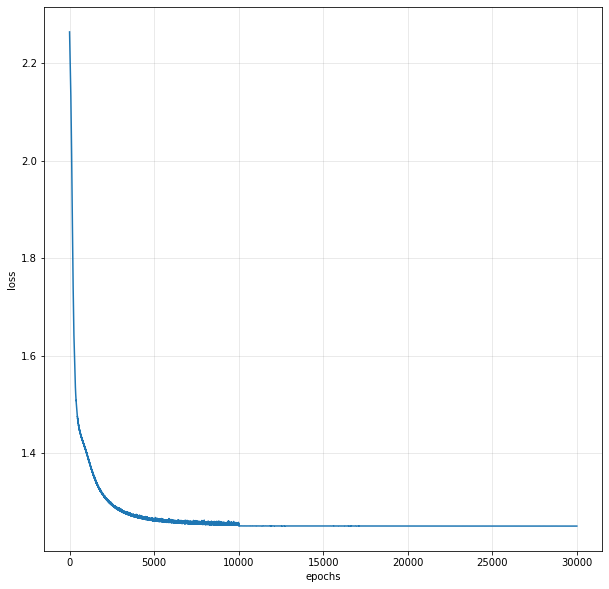

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(range(0, len(losses)), losses)
plt.xlabel('epochs')
plt.ylabel('loss')
ax.grid(color='grey', alpha=0.2)

# Auswertung der Ergebnisse
Nachdem das neuronale Netz trainiert worden ist wollen wir uns die Ergebnisse anschauen. Im speziellen wollen wir die Gewichte des Hidden-Layers extrahieren, da diese gerade der Matrix entsprechen, die die Eingangsdaten in die trainierte Vektorrepräsentation umwandeln.

In [15]:
print(model.layers[1].get_weights()[0])
w2v = model.layers[1].get_weights()[0]

[[ 1.805875    2.6587796 ]
 [-2.6259093   0.26252672]
 [-1.5688682   0.3233042 ]
 [ 0.84939     0.82979524]
 [-0.70570767 -1.9121077 ]
 [ 3.2661748   0.04983805]
 [-3.4581776  -2.6745749 ]
 [ 3.2826853   3.7616265 ]
 [-2.715026   -2.2785351 ]
 [ 1.2855737   0.8872515 ]]


Mithilfe diese Matrix können wir die Wörter nun in ihre Vektoren transformieren:

In [16]:
dozent = np.matmul(w2v.transpose(),to_one_hot_encoding(word2int['dozent']))
mann = np.matmul(w2v.transpose(),to_one_hot_encoding(word2int['mann']))
frau = np.matmul(w2v.transpose(),to_one_hot_encoding(word2int['frau']))
print('Dozent: {}'.format(dozent))
print('Mann: {}'.format(mann))
print('Frau: {}'.format(frau))

Dozent: [-2.7150259  -2.27853513]
Mann: [-0.70570767 -1.91210771]
Frau: [3.26617479 0.04983805]


## Similarity
Mit Hilfe der Matrix können wir jetzt ganz einfach alle ähnlichkeiten via

$$similarity(\vec v_1,\vec v_2) = 1-cos(\theta)  = 1 - \frac{\vec{v}_1 \cdot \vec v_2}{||\vec v_1|| \cdot ||\vec v_2||}$$

berechnen (Lineare Algebra). 

In [17]:
from scipy.spatial.distance import cosine
def get_most_similar(_in, matrix, LookUp_dict):
    similarity_vec = np.array([cosine(x, _in) for x in matrix])
    similarity_vec_indices = similarity_vec.argsort()[:3]
    return [list(word2int.keys())[i] for i in similarity_vec_indices]

In [18]:
print(get_most_similar(mann, w2v, word2int))

['mann', 'dozent', 'student']


# Visualisierung der Ergebnisse
Wa wir erreichen wollten ist eine Vektorrepäsentation bei der Wörter die of in dem gleichen Kontext verwendet werden große Ähnlichkeit (similarity) haben sollten, d.h. in unserem Beispiel mit einer 2-dim Repräsentation können wir dies sehr einfach visuell überprüfen:

In [19]:
w2v_df = pd.DataFrame(w2v, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

word        x1        x2
0      weise  1.805875  2.658780
1      guter -2.625909  0.262527
2     junger -1.568868  0.323304
3  studentin  0.849390  0.829795
4       mann -0.705708 -1.912108
5       frau  3.266175  0.049838
6    student -3.458178 -2.674575
7      junge  3.282685  3.761626
8     dozent -2.715026 -2.278535
9   dozentin  1.285574  0.887251

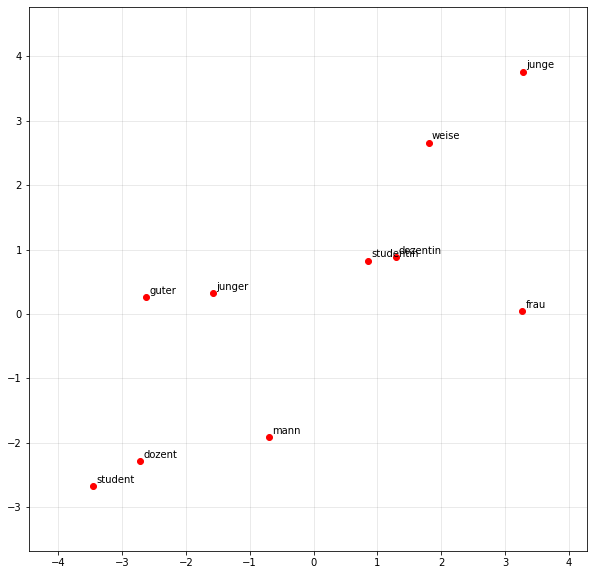

In [20]:
fig2, ax = plt.subplots(figsize=(10, 10))

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1+0.05,x2+0.05 ))

# add dots
plt.scatter(w2v_df['x1'], w2v_df['x2'], marker ='o', color='red')

PADDING = 1.0
x_axis_min = np.amin(w2v, axis=0)[0] - PADDING
y_axis_min = np.amin(w2v, axis=0)[1] - PADDING
x_axis_max = np.amax(w2v, axis=0)[0] + PADDING
y_axis_max = np.amax(w2v, axis=0)[1] + PADDING
    
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
ax.grid(color='grey', alpha=0.2)

In [21]:
test_dozentin = dozent - mann + frau
dozentin = np.matmul(to_one_hot_encoding(word2int['dozentin']), w2v)
print(test_dozentin, dozentin)
print('similarity: {:0.2f}'.format(1-cosine(test_dozentin, dozentin)))

[ 1.25685656 -0.31658937] [1.28557372 0.8872515 ]
similarity: 0.66


Text(-2.009318232536316, -0.3664274215698242, '')

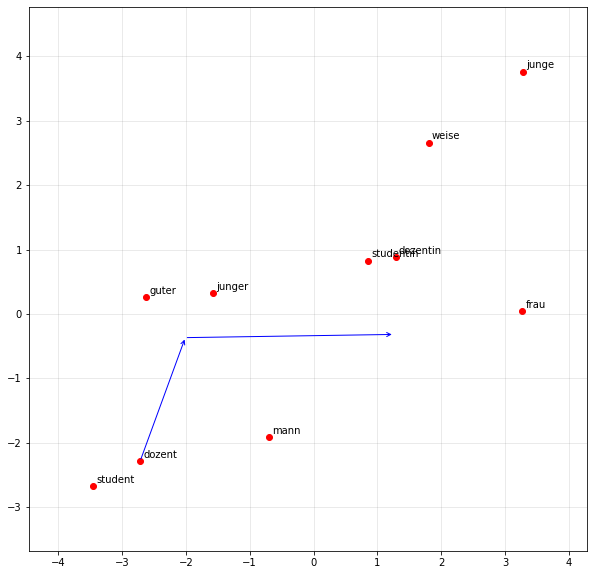

In [22]:
fig3, ax = plt.subplots(figsize=(10, 10))

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1+0.05,x2+0.05 ))

# add dots
plt.scatter(w2v_df['x1'], w2v_df['x2'], marker ='o', color='red')

PADDING = 1.0
x_axis_min = np.amin(w2v, axis=0)[0] - PADDING
y_axis_min = np.amin(w2v, axis=0)[1] - PADDING
x_axis_max = np.amax(w2v, axis=0)[0] + PADDING
y_axis_max = np.amax(w2v, axis=0)[1] + PADDING

plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
ax.grid(color='grey', alpha=0.2)
ax.annotate("", xy=(dozent[0]-mann[0], dozent[1]-mann[1]), xytext=(dozent[0], dozent[1]), arrowprops=dict(arrowstyle="->", color='blue'))
ax.annotate("", xy=(dozent[0]-mann[0]+frau[0], dozent[1]-mann[1]+frau[1]), xytext=(dozent[0]-mann[0], dozent[1]-mann[1]), arrowprops=dict(arrowstyle="->", color='blue'))

> **Bemerkung**: der letzte Teil dieses kleinen Beispieles funktioniert nicht immer, da das Trainingsset zu klein ist. In dem anderen Notebook **Word2Vec.ipynb** ist ein deutlich stabileres Beispiel trainiert worden (mit dem python-package gen-sim) 